<a href="https://colab.research.google.com/github/GauravSahani1417/Cotton-Disease-prediction-using-Colab/blob/master/Cotton_Disease_prediction_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Taken from tensorflow documentation, in order to keep working the GPU usage upto just 50% limit.
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
# re-size all the images to 224*224
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Cotton disease prediction/train'
valid_path = '/content/drive/My Drive/Cotton disease prediction/val'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Cotton disease prediction/train/*')

In [8]:
len(folders)

4

In [9]:
# We'll flatten the last layers, in order to add our output layers to resnet50 model
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
#Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Cotton disease prediction/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Cotton disease prediction/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [16]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 597s 10s/step - loss: 3.1940 - accuracy: 0.3936 - val_loss: 0.9825 - val_accuracy: 0.6389
Epoch 2/20
61/61 [==============================] - 45s 737ms/step - loss: 1.0676 - accuracy: 0.5838 - val_loss: 1.2373 - val_accuracy: 0.5370
Epoch 3/20
61/61 [==============================] - 45s 739ms/step - loss: 0.9965 - accuracy: 0.5915 - val_loss: 0.9983 - val_accuracy: 0.6790
Epoch 4/20
61/61 [==============================] - 45s 736ms/step - loss: 0.7754 - accuracy: 0.6853 - val_loss: 0.7385 - val_accuracy: 0.7160
Epoch 5/20
61/61 [==============================] - 45s 742ms/step - loss: 0.8778 - accuracy: 0.6468 - val_loss: 0.8284 - val_accuracy: 0.7006
Epoch 6/20
61/61 [==============================] - 45s 738ms/step - loss: 0.9108 - accuracy: 0.6448 - val_loss: 1.3274 - val_accuracy: 0.6080
Epoch 7/20
61/61 [==============================] - 45s 744ms/step 

In [17]:
import matplotlib.pyplot as plt

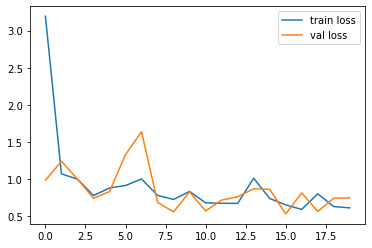

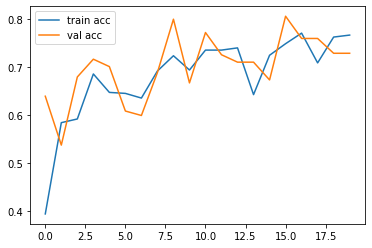

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# saving it as a h5 file
from tensorflow.keras.models import load_model

model.save('cotton_disease_resnet50.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[2.5140159e-04, 7.0542127e-02, 2.3543190e-03, 9.2685217e-01],
       [6.7729357e-04, 1.3345984e-02, 2.5104180e-01, 7.3493493e-01],
       [9.5454812e-01, 2.0488596e-02, 2.3143526e-02, 1.8196719e-03],
       ...,
       [1.1423586e-03, 3.9875621e-01, 5.3436954e-02, 5.4666448e-01],
       [1.2329430e-02, 5.1735225e-03, 9.5207971e-01, 3.0417342e-02],
       [2.3803426e-01, 1.2905242e-01, 4.8280519e-01, 1.5010814e-01]],
      dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

y_pred

array([3, 3, 0, 1, 1, 3, 1, 3, 2, 0, 2, 2, 2, 2, 3, 2, 1, 3, 3, 1, 0, 1,
       2, 1, 3, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 2, 1, 2, 1, 3, 1, 2, 1, 0,
       2, 3, 1, 2, 2, 1, 1, 3, 2, 3, 1, 0, 2, 0, 2, 3, 1, 1, 1, 2, 2, 3,
       0, 1, 3, 1, 1, 1, 1, 3, 1, 2, 3, 2, 1, 3, 2, 1, 2, 3, 3, 1, 1, 2,
       2, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 3, 1, 1, 0, 2, 2, 2, 3, 1, 1,
       1, 1, 0, 0, 0, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 2, 1, 3, 2, 2, 2, 2,
       2, 1, 3, 3, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 3, 3, 2, 3, 1,
       2, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1,
       2, 3, 2, 3, 2, 2, 0, 3, 2, 1, 3, 2, 0, 1, 1, 2, 2, 3, 1, 1, 2, 1,
       2, 1, 3, 1, 3, 1, 2, 3, 2, 1, 3, 1, 3, 0, 3, 1, 2, 1, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       1, 1, 2, 1, 3, 1, 1, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2,
       2, 3, 1, 3, 1, 3, 0, 2, 1, 3, 2, 3, 1, 3, 1, 3, 2, 2, 3, 0, 1, 2,
       1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 3, 2, 3, 2, 3,